Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
args = fovea.Params(do_fovea=True, subset_factor=1)
args

Params(image_size=224, do_mask=False, do_fovea=True, rs_min=0.0, rs_max=-7.5, padding_mode='zeros', seed=2018, batch_size=80, num_workers=1, in_memory=False, model_name='convnext_base', num_epochs=41, subset_factor=1, lr=2e-07, delta1=0.2, delta2=0.007, weight_decay=0.003, label_smoothing=0.05, shuffle=True, verbose=False)

In [2]:
fovea.all_cn_model_names

['convnext_tiny', 'convnext_base', 'convnext_large']

In [3]:
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings(
#     "ignore",
#     message=r"iCCP: profile 'ICC Profile'",
#     category=UserWarning,
#     module='PIL.PngImagePlugin'
# )

# testing each network on the validation dataset

In [4]:
%ls -lh "cached_data/32_"*

-rw-r--r--  1 laurent  staff   3,7K  5 déc.  11:45 cached_data/32_fovea_model_name=convnext_base_dataset=bbox_20epochs.json
-rw-r--r--  1 laurent  staff   338M  3 déc.  15:39 cached_data/32_fovea_model_name=convnext_base_dataset=bbox_20epochs.pth
-rw-r--r--@ 1 laurent  staff   7,4K  6 déc.  07:25 cached_data/32_fovea_model_name=convnext_base_dataset=bbox_40epochs.json
-rw-r--r--@ 1 laurent  staff   338M  6 déc.  07:25 cached_data/32_fovea_model_name=convnext_base_dataset=bbox_40epochs.pth
-rw-r--r--@ 1 laurent  staff   7,4K  6 déc.  07:17 cached_data/32_fovea_model_name=convnext_base_dataset=bbox.json
-rw-r--r--@ 1 laurent  staff   338M  6 déc.  07:17 cached_data/32_fovea_model_name=convnext_base_dataset=bbox.pth


In [5]:
# %cp "cached_data/32_fovea_model_name=convnext_base_dataset=bbox_20epochs.pth" "cached_data/32_fovea_model_name=convnext_base_dataset=bbox.pth"
# %cp "cached_data/32_fovea_model_name=convnext_base_dataset=bbox_20epochs.json" "cached_data/32_fovea_model_name=convnext_base_dataset=bbox.json"

In [6]:
# %cp "cached_data/32_fovea_model_name=convnext_base_dataset=bbox.pth" "cached_data/32_fovea_model_name=convnext_base_dataset=bbox_40epochs.pth" 
# %cp "cached_data/32_fovea_model_name=convnext_base_dataset=bbox.json" "cached_data/32_fovea_model_name=convnext_base_dataset=bbox_40epochs.json"

In [7]:
# %rm "cached_data/32_fovea_model_name=convnext_base_dataset=bbox"*  # FORCING RECOMPUTE
%rm "cached_data/32_fovea_model_name=convnext_base_dataset=bbox.lock"  # FORCING RECOMPUTE
# %rm cached_data/32_fovea_model_*  # FORCING RECOMPUTE
# %rm cached_data/32_fovea_model_*.lock  # FORCING RECOMPUTE
model_name = args.model_name
# do_full_training
for dataset in ['bbox']: # fovea.all_datasets:
    name = f'32_fovea_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

rm: cached_data/32_fovea_model_name=convnext_base_dataset=bbox.lock: No such file or directory
Load JSON from pre-trained resnet cached_data/32_fovea_model_name=convnext_base_dataset=bbox.json
cached_data/32_fovea_model_name=convnext_base_dataset=bbox.pth: accuracy = 0.775
Training model convnext_base, file= cached_data/32_fovea_model_name=convnext_base_dataset=bbox.pth - image_size=224


Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch=41/41:   0%|          | 0/7691 [00:01<?, ?it/s]

Evaluating convnext_base:   0%|          | 0/1005 [00:01<?, ?it/s]

Training of ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          

In [8]:
name

'32_fovea_model_name=convnext_base_dataset=bbox'

## Model comparison

In [9]:
# model_name = args.model_name
# for dataset in fovea.all_datasets:
#     results = fovea.pd.read_json(args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}.json')
#     print(model_name, dataset, results.tail(1)['acc_val'])

In [10]:
model_name = args.model_name
# for dataset in fovea.all_datasets:
for dataset in ['bbox']: # fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

convnext_base bbox 40    0.762027
Name: acc_val, dtype: float64


In [11]:

len(results)

41

In [12]:
results.tail(10)

,epoch,i_image,total_image,loss_train,acc_train,acc_val,time
31,31,126000,1512000,0.002890,0.897079,0.767869,17751.162067
32,32,126000,1638000,0.002596,0.899786,0.771034,19222.444534
33,33,126000,1764000,0.002397,0.904254,0.773518,20723.810764
34,34,126000,1890000,0.002261,0.906230,0.772276,22194.626801
35,35,126000,2016000,0.002165,0.907476,0.775321,23665.919795
36,36,126000,2142000,0.002089,0.909452,0.774319,25166.344210
37,37,126000,2268000,0.002034,0.910976,0.774479,26637.565396
38,38,126000,2394000,0.001987,0.912714,0.773918,28108.822010
39,39,126000,2520000,0.001951,0.914913,0.776042,29609.987555
40,40,615280,615280,0.001530,0.896101,0.762027,7043.978198


In [13]:
results['acc_val']

0     0.718252
1     0.736838
2     0.746504
3     0.752451
4     0.756979
5     0.760736
6     0.763485
7     0.764916
8     0.768175
9     0.769332
10    0.771671
11    0.772853
12    0.774109
13    0.774570
14    0.775341
15    0.776336
16    0.775863
17    0.776871
18    0.778414
19    0.777518
20    0.001042
21    0.001002
22    0.001002
23    0.001002
24    0.001002
25    0.001002
26    0.662340
27    0.731611
28    0.754768
29    0.764062
30    0.768910
31    0.767869
32    0.771034
33    0.773518
34    0.772276
35    0.775321
36    0.774319
37    0.774479
38    0.773918
39    0.776042
40    0.762027
Name: acc_val, dtype: float64

In [14]:
# results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
# results_13

In [15]:
%ls cached_data/20*

cached_data/20_model_name=convnext_base_dataset=bbox.json
cached_data/20_model_name=convnext_base_dataset=bbox.pth


In [16]:
model_name, dataset

('convnext_base', 'bbox')

In [17]:
# results_20 = fovea.pd.read_json(args.data_cache / '20_model_name={model_name}_dataset={dataset}.json')
# results_20

In [18]:
# for dataset in fovea.all_datasets:
#     name = f'20_model_name={model_name}_dataset={dataset}'
#     model_filename, json_filename = fovea.do_learning(args, dataset, name)
#     results = fovea.pd.read_json(json_filename)
#     print(results)

## Plot learning evolution

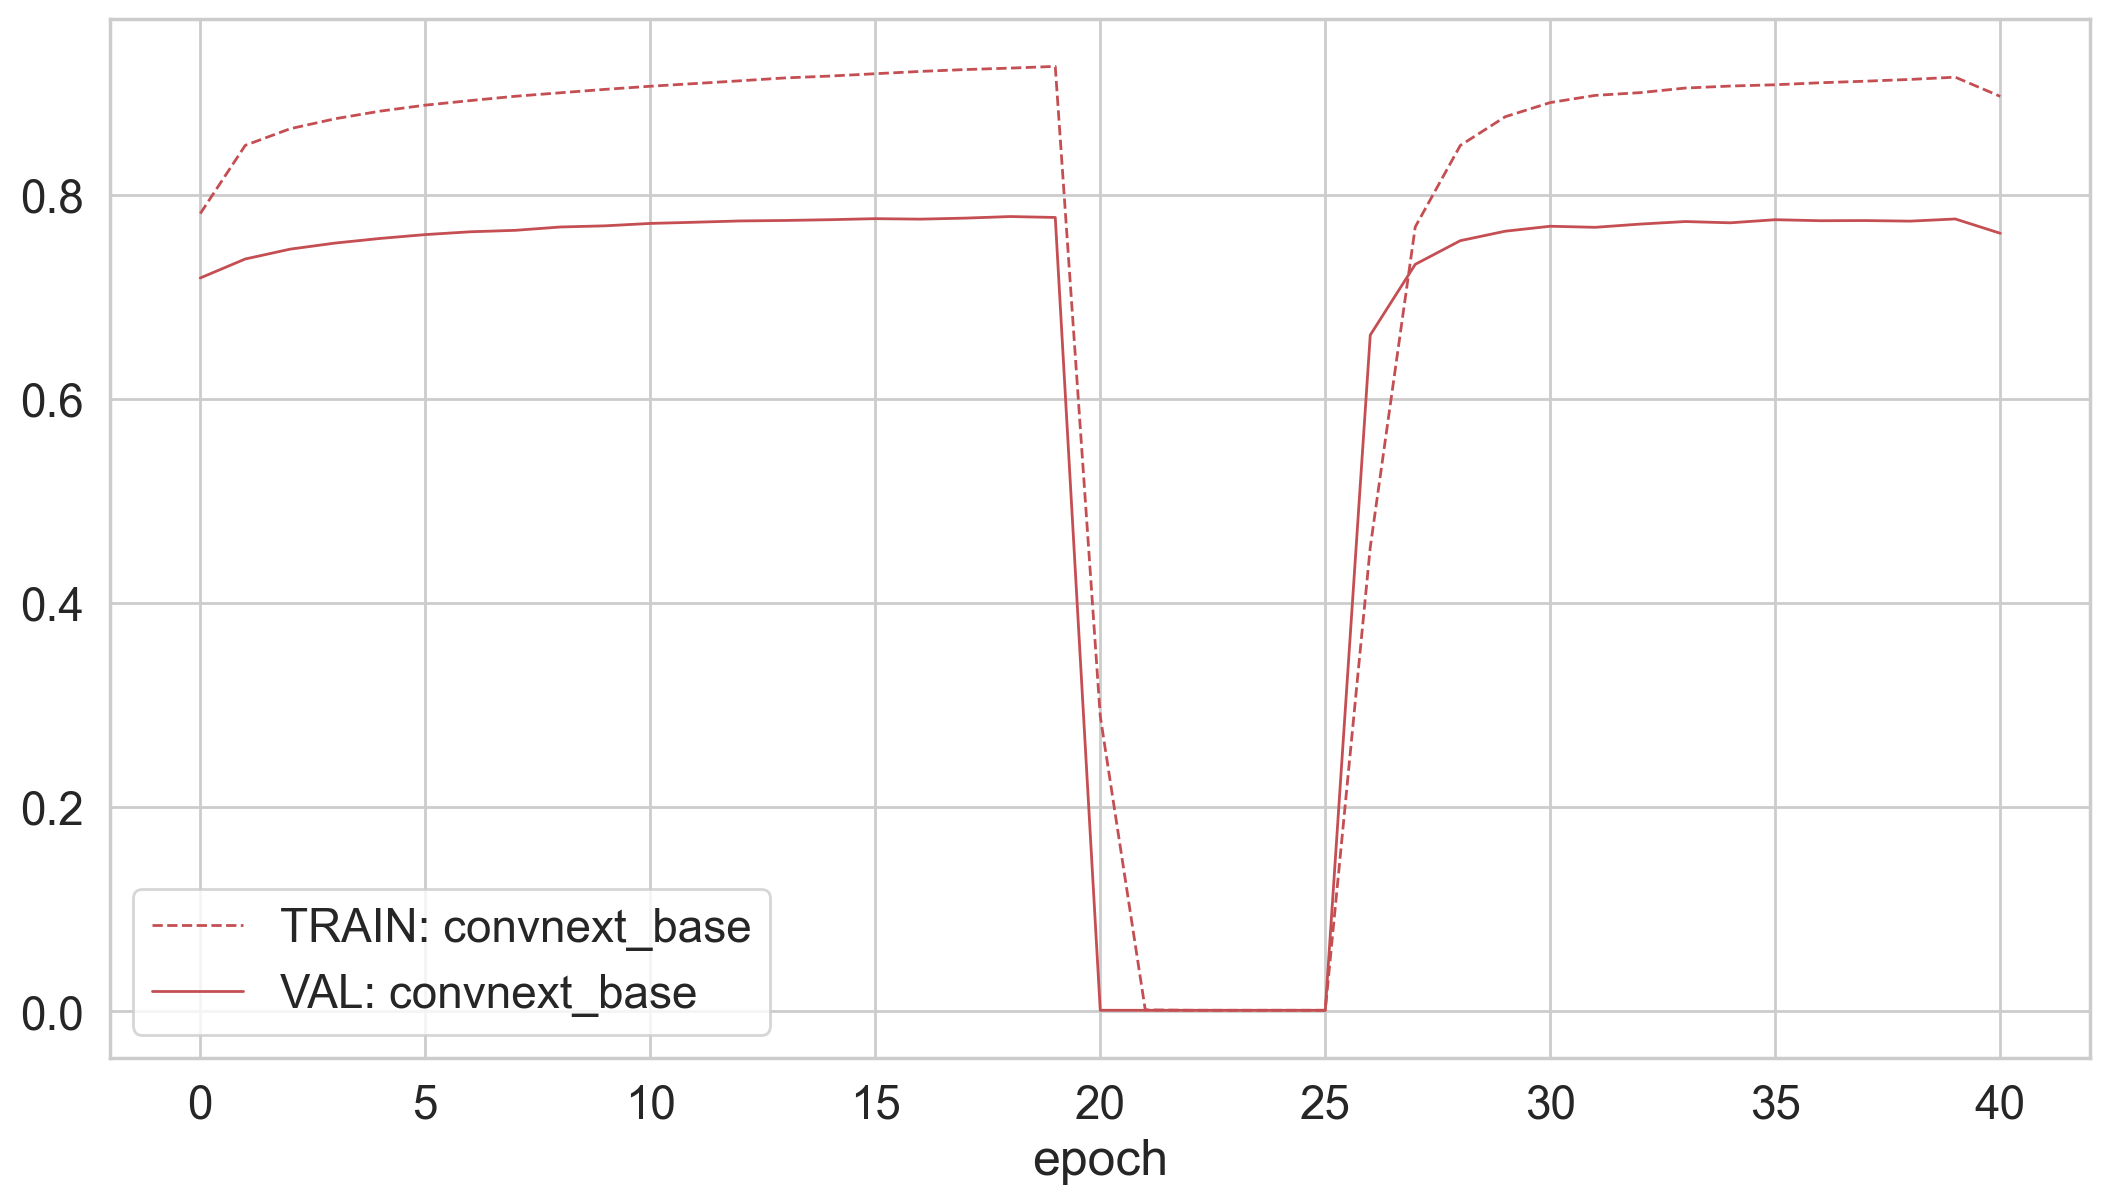

In [19]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']:#fovea.all_datasets:
    color = 'r'
    lw = 1

    # name = f'33_fovea_model_name={model_name}_dataset={dataset}'
    # cached_data/33_fovea_model_name=resnet101_dataset=bbox.json
    json_filename = args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}.json'
    # model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    # df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train.plot(x='epoch', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train.plot(x='epoch', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [20]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,acc_val,time
0,0,615168,615168,1.203572,0.781305,0.718252,9142.823557
1,1,615168,1230336,0.875897,0.848142,0.736838,18281.599445
2,2,615168,1845504,0.811994,0.864445,0.746504,27413.773697
3,3,615168,2460672,0.773544,0.874221,0.752451,36554.460357
4,4,615168,3075840,0.745903,0.881665,0.756979,45695.880429
5,5,615168,3691008,0.724733,0.887512,0.760736,54833.985997
6,6,615168,4306176,0.708025,0.891995,0.763485,63975.054511
7,7,615168,4921344,0.692292,0.896217,0.764916,73116.500268
8,8,615168,5536512,0.679182,0.899627,0.768175,82268.994613
9,9,615168,6151680,0.668300,0.902987,0.769332,91415.433386
